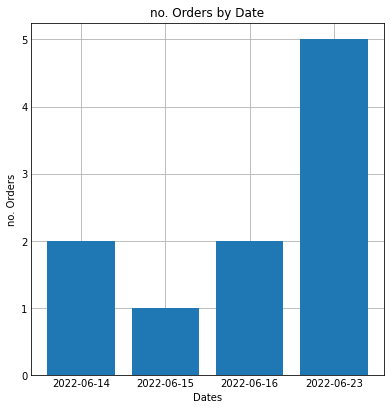

In [11]:
import matplotlib.pyplot as plt
import numpy as np
import database

plt.style.use('_mpl-gallery')

# make data
con = database.get_connection()
cur = database.get_cursor(con)

database.sql_statement(cur,'''SELECT order_time from Orders ORDER BY order_time''')
a = cur.fetchall()
dates = {}
for i in a:
       if i[0].date() in dates.keys():
              dates[i[0].date()] +=1
       else:
            dates[i[0].date()] = 1

x = []
for i in dates.keys():
       x.append(str(i))

y = []
for i in dates.values():
       y.append(int(i))


database.sql_statement(cur,'''SELECT DATE(order_time)as date, count(*) as total from Orders group by order_time''')
data = cur.fetchall()



# plot

plt.figure(figsize=(5,5))


plt.bar(x, y,)

plt.title('no. Orders by Date')

plt.ylabel('no. Orders')

plt.xlabel('Dates')

plt.show()

database.close_cursor(cur)
database.close_connection(con)